In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Нейронная сеть**

#Распознавание марок машин (маленькая база)

Добейтесь точности не менее 85% на проверочной выборке на базе трех иномарок. 

Размер проверочной выборки - 20%.

In [ ]:
import gdown
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://storage.googleapis.com/datasets_ai/Base/5_Conv/middle_fmr.zip', None, quiet=True)

'middle_fmr.zip'

In [ ]:
!unzip -q "middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 45 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.15, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.15, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.15, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


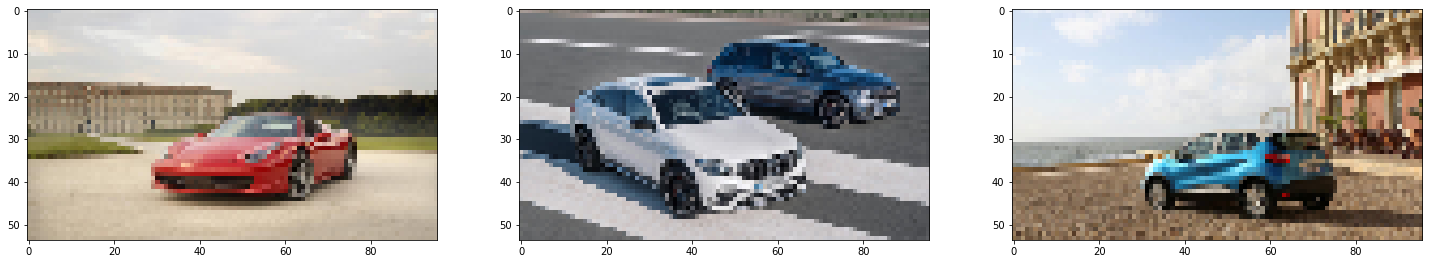

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
model.add(BatchNormalization(input_shape=(img_width, img_height, 3)))
#Первый сверточный слой
model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
#Четвертый сверточный слой
model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Пятый сверточный слой

#model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
#Четвертый сверточный слой
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(768, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(768, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой
model.add(BatchNormalization())
#Выходной полносвязный слой
model.add(Dense(96, activation='relu'))  #?
model.add(Dropout(0.25))
model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Batc  (None, 96, 54, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 96, 54, 96)        2688      
                                                                 
 conv2d_17 (Conv2D)          (None, 96, 54, 96)        83040     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 27, 96)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 24, 27, 96)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 24, 27, 96)      

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=5,
    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
60/60 [==============================] - 18s 295ms/step - loss: 0.6115 - accuracy: 0.7513 - val_loss: 0.8407 - val_accuracy: 0.6504
Epoch 2/5
60/60 [==============================] - 15s 257ms/step - loss: 0.6187 - accuracy: 0.7450 - val_loss: 0.9259 - val_accuracy: 0.5822
Epoch 3/5
60/60 [==============================] - 15s 247ms/step - loss: 0.5936 - accuracy: 0.7554 - val_loss: 1.0080 - val_accuracy: 0.6030
Epoch 4/5
60/60 [==============================] - 13s 223ms/step - loss: 0.5812 - accuracy: 0.7646 - val_loss: 0.8232 - val_accuracy: 0.6548
Epoch 5/5
60/60 [==============================] - 13s 221ms/step - loss: 0.5709 - accuracy: 0.7717 - val_loss: 0.8476 - val_accuracy: 0.6622


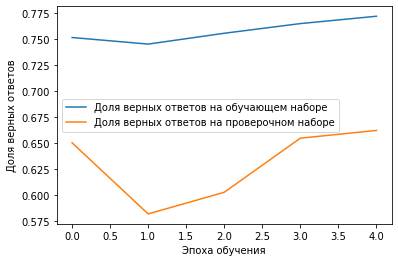

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer=Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Дообучаем сеть на выборке
history2 =  model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
60/60 [==============================] - 15s 228ms/step - loss: 0.0192 - accuracy: 0.9918 - val_loss: 1.1511 - val_accuracy: 0.8252
Epoch 2/20
60/60 [==============================] - 13s 220ms/step - loss: 0.0205 - accuracy: 0.9926 - val_loss: 1.1006 - val_accuracy: 0.8207
Epoch 3/20
60/60 [==============================] - 13s 221ms/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 1.0834 - val_accuracy: 0.8119
Epoch 4/20
60/60 [==============================] - 13s 222ms/step - loss: 0.0195 - accuracy: 0.9930 - val_loss: 0.9074 - val_accuracy: 0.8370
Epoch 5/20
60/60 [==============================] - 13s 222ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 1.0704 - val_accuracy: 0.8148
Epoch 6/20
60/60 [==============================] - 13s 222ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.9846 - val_accuracy: 0.8326
Epoch 7/20
60/60 [==============================] - 13s 222ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.9541 - val_accuracy: 0.8400

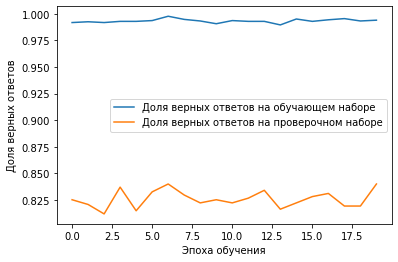

In [ ]:
#Оображаем график точности обучения
plt.plot(history2.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history2.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer=Adam(0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Дообучаем сеть на выборке
history3 =  model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=2,
    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/2
60/60 [==============================] - 15s 230ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 1.0998 - val_accuracy: 0.8370
Epoch 2/2
60/60 [==============================] - 13s 221ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 1.1639 - val_accuracy: 0.8578


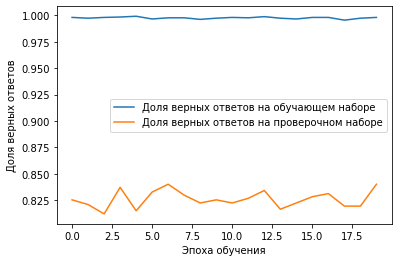

In [ ]:
#Оображаем график точности обучения
plt.plot(history3.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history2.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.save('cars3.h5')

Для более глубокого понимания использования библиотеки хорошо уметь искать информацию в документациях от разработчика. Официальная документация доступна на английском языке.

**Документация Keras** - https://keras.io/ 

**Русскоязычная документация Keras** - https://ru-keras.com/ 

Помимо официальной документации можно найти огромное количество полезной информации и в других источниках.

**Полезные статьи habr:**

https://habr.com/ru/post/348000/

https://habr.com/ru/post/309508/